In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [12]:
# Load dataset
df = pd.read_csv('airlines_flights_data.csv')

In [13]:
# Basic info
print('shape:', df.shape)
print('\ncolumns:', df.columns.tolist())
df.head()

shape: (300153, 12)

columns: ['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [14]:
# Checking for missing values and data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [15]:
# Statistical summary
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [16]:
# import custom modules
from src.data_preprocessing import load_data, clean_data, get_features_and_target
from src.model_training import train_model

In [17]:
# step 1: load the load_data
df = load_data('airlines_flights_data.csv')
print('data loaded successfully!')
print(df.head())

data loaded successfully!
   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [18]:
# step 2: clean the data 
df_cleaned = clean_data(df)
print('data cleaned successfully!')
print(df_cleaned.head())

data cleaned successfully!
    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [19]:
print(df_cleaned.columns)

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


In [20]:
from src.data_preprocessing import load_data, clean_data, get_features_and_target

In [21]:
df = load_data('airlines_flights_data.csv')
df_cleaned = clean_data(df)
X, y = get_features_and_target(df_cleaned)

In [22]:
print("Features and target extracted successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)

Features and target extracted successfully!
X shape: (300153, 2)
y shape: (300153,)


In [23]:
from src.model_training import train_model
model = train_model(X, y)

Model Performance:
MAE: 19129.17
MSE: 489490905.72
R2 Score: 0.0504

Model saved to models/flight_price_model.pkl


In [24]:
import os
print(os.path.exists('models/flight_price_model.pkl'))

True


In [25]:
import joblib

# Load the saved model
model = joblib.load('models/flight_price_model.pkl')

# Example: Predict flight price for a flight
# (duration = 12 hours, days_left = 25)
sample_data = [[12.0, 25]]
predicted_price = model.predict(sample_data)
print("Predicted Price:", predicted_price)

Predicted Price: [20896.58889003]


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Exploratory Data Analysis (EDA)
Let's explore and visualize the dataset to understand patterns and relationships.

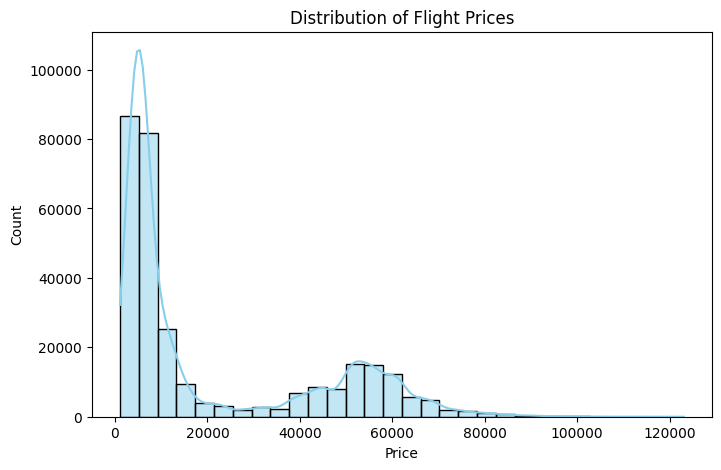

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

### 📊 Interpretation: Distribution of Flight Prices

- The majority of flights are clustered at the lower end of the price range (below ₹20,000).
- There’s a long right tail, meaning a few flights are very expensive — these are outliers.
- The distribution is right-skewed (positively skewed), which is typical for price data.
- There may be two visible peaks, which could mean different fare classes or airlines (like economy vs business).

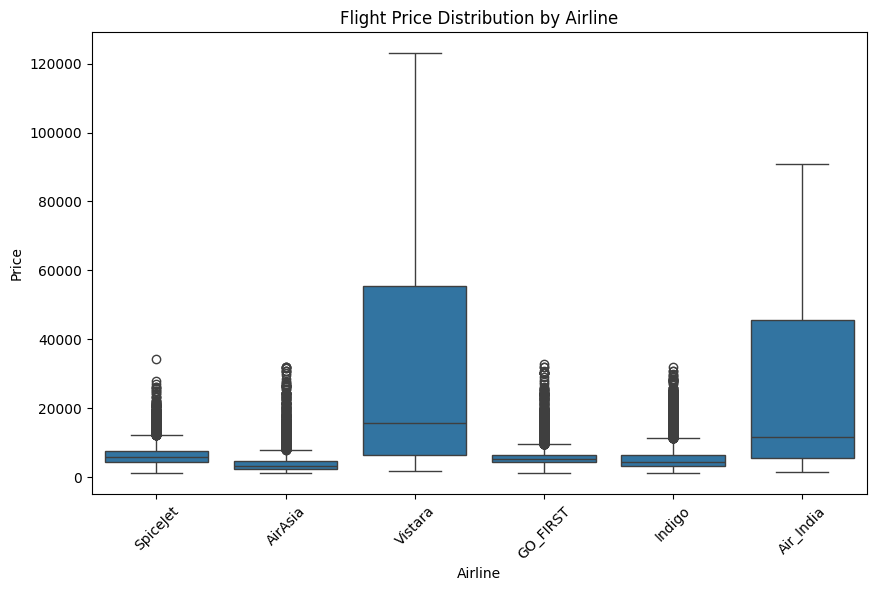

In [27]:
# Price by Airline
plt.figure(figsize=(10,6))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Flight Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

📝 Interpretation: Flight Prices by Airline

Vistara and Air India have the highest median and maximum prices, indicating they are premium airlines.

SpiceJet, AirAsia, GO_FIRST, and Indigo offer lower and more consistent prices, suggesting they are budget airlines.

There are several outliers in all airlines — these represent a few very expensive flights (possibly last-minute or business class).

Overall, the price variation is largest for full-service airlines and much smaller for low-cost carriers.

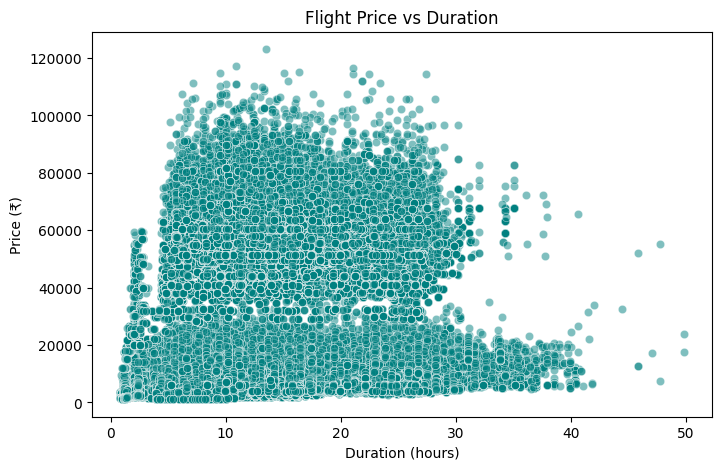

In [28]:
# Price vs Duration
plt.figure(figsize=(8,5))
sns.scatterplot(x='duration', y='price', data=df, alpha=0.5, color='teal')
plt.title('Flight Price vs Duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Price (₹)')
plt.show()

### Interpretation: Flight Price vs Duration

There’s a positive trend — longer flights generally tend to have higher prices. However, the relationship isn’t perfectly linear, meaning other factors (like airline, number of stops, and season) also influence prices. Some long-duration flights are still low-priced — these could be connecting flights with layovers. The cluster of shorter flights with low prices represents domestic or short-haul routes. A few high-duration and high-price points indicate international or premium flights.

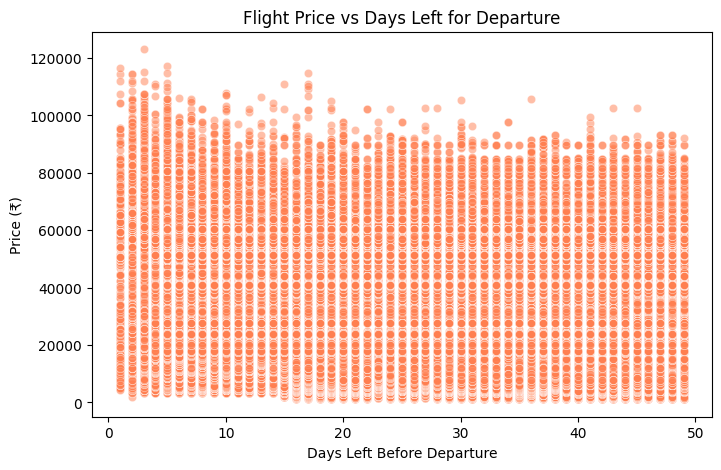

In [29]:
# Price vs Days Left
plt.figure(figsize=(8,5))
sns.scatterplot(x='days_left', y='price', data=df, alpha=0.5, color='coral')
plt.title('Flight Price vs Days Left for Departure')
plt.xlabel('Days Left Before Departure')
plt.ylabel('Price (₹)')
plt.show()

✈️ Interpretation: Flight Price vs Days Left for Departure

There’s a slight downward trend — flights booked earlier (more days left) tend to have lower prices.

Prices become more unpredictable and higher as the departure date gets closer.

Some flights remain expensive regardless of booking time, likely due to premium airlines or high-demand routes.

Overall, this shows a negative correlation between booking time and flight price — early bookings are cheaper.

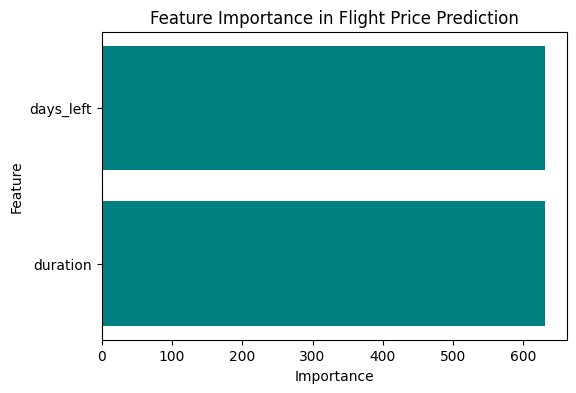

In [30]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Load trained model
model = joblib.load('models/flight_price_model.pkl')

# Feature names (same order as used in training)
features = ['duration', 'days_left']

# Check if model supports feature_importances_ or coefficients
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
elif hasattr(model, 'coef_'):
    importances = np.abs(model.coef_[0])
else:
    importances = [0] * len(features)

# Plot
plt.figure(figsize=(6,4))
plt.barh(features, importances, color='teal')
plt.title('Feature Importance in Flight Price Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Interpretation: Feature Importance

Both days_left and duration have a strong positive influence on flight prices.

This means the model relies heavily on how early the ticket is booked and how long the flight is.

It aligns with real-world logic — longer flights and last-minute bookings are more expensive.